# Demos of Voxel VAE's Magic

Good results - we can recreate and combine shapes!

Real limitations -

1. 32x32x32 is too small to capture great granularity but greater resolution leads to excessive training times
2. Model is currently just a VAE; GAN outsmarted us
3. GAN-less solution yields blurry edges
4. Convolution layer size misses gaps in shapes
5. Limited by mostly furniture-centric dataset

Stats -

1. Model Training Time - 4 days, 10 hours (no GPU)
2. Objects in dataset - 70k+


In [2]:
import env
from data import DEMOS_DIR
from data.stl import plot_mesh, read_mesh_vectors
from data.voxels import plot_voxels, read_voxel_array
from collections import defaultdict
import numpy as np
import os

In [3]:
def plot_binvox(path, name):
    if '.npy' in path:
        vox_data = np.load(path)
    else:
        vox_data = read_voxel_array(path).data
    plot_voxels(vox_data, title=name)

    
def plot_recons(root, src):
    orig_path = os.path.join(root, src + '.orig.binvox')
    recon_path = os.path.join(root, src + '.recon.binvox.npy')
    plot_binvox(orig_path, src)
    plot_binvox(recon_path, src)
    
    
def plot_combos(root, src1, src2):
    orig1_path = os.path.join(root, src1 + '.orig.binvox')
    orig2_path = os.path.join(root, src2 + '.orig.binvox')
    combo_name = '.'.join([src1, src2, 'combo', 'stl', 'npy'])
    combo_path = os.path.join(root, combo_name)
    plot_binvox(orig1_path, src1)
    plot_binvox(orig2_path, src2)
    plot_binvox(combo_path, combo_name)

## Bad Reconstructions

In [21]:
root = os.path.join(DEMOS_DIR, 'bad_reconstructions')

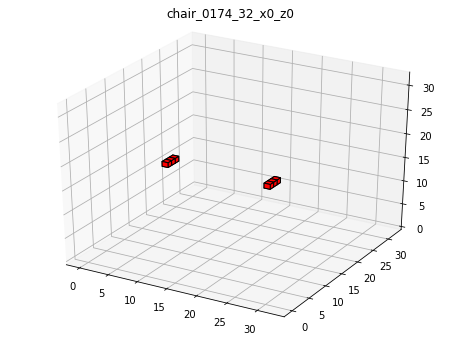

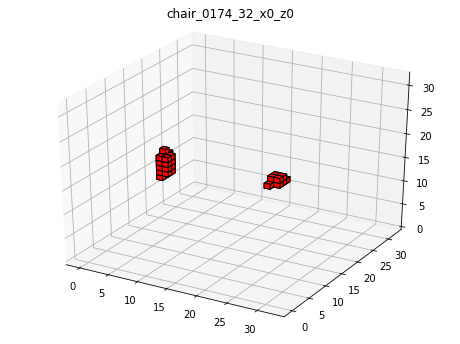

In [23]:
# bad voxelization
plot_recons(root, 'chair_0174_32_x0_z0')

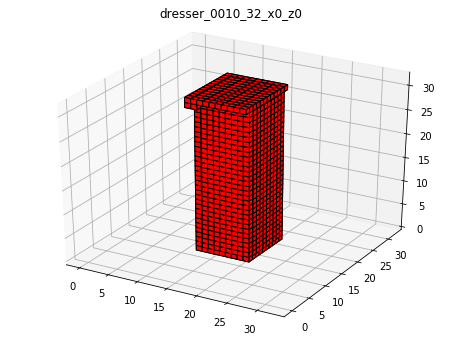

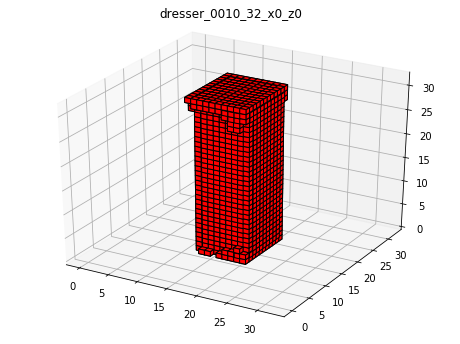

In [24]:
# boring shape
plot_recons(root, 'dresser_0010_32_x0_z0')

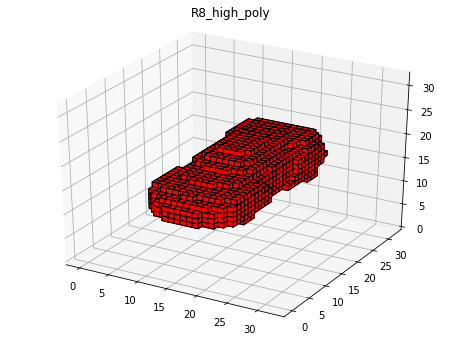

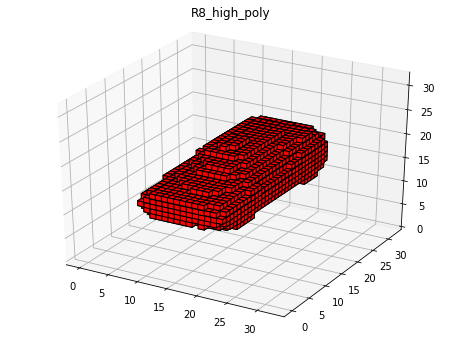

In [25]:
# not enough granularity
plot_recons(root, 'R8_high_poly')

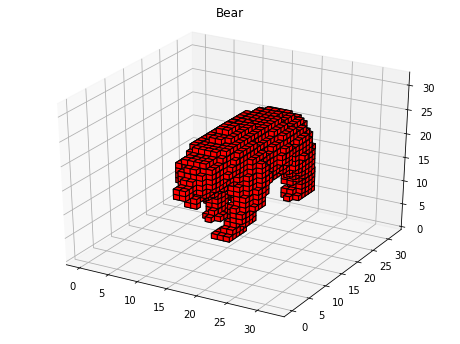

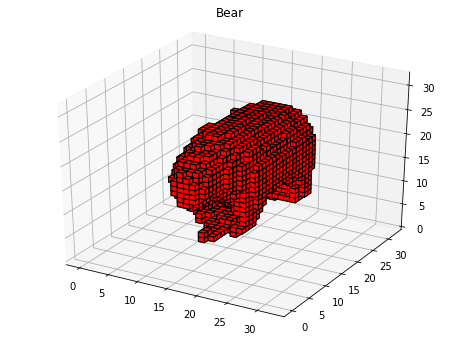

In [22]:
# not enough granularity
plot_recons(root, 'Bear')

## Good Reconstructions

In [5]:
root = os.path.join(DEMOS_DIR, 'good_reconstructions')

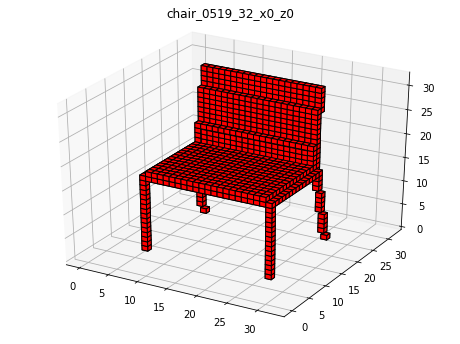

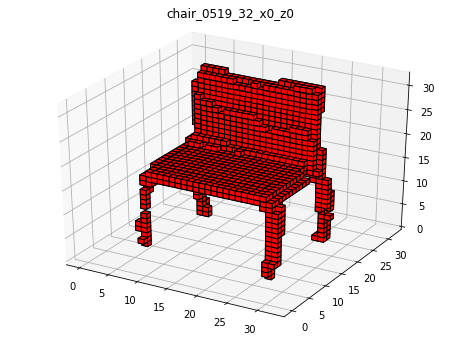

In [28]:
plot_recons(root, 'chair_0519_32_x0_z0')

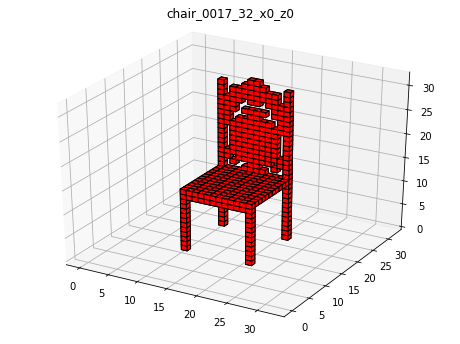

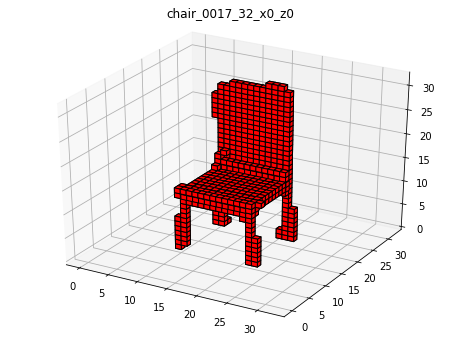

In [29]:
plot_recons(root, 'chair_0017_32_x0_z0')

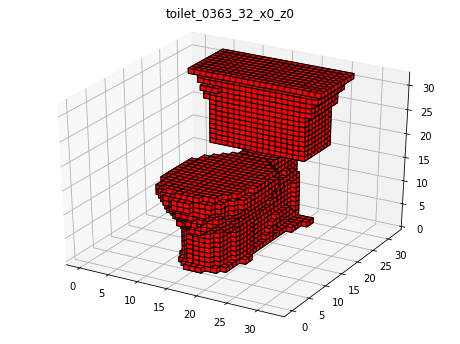

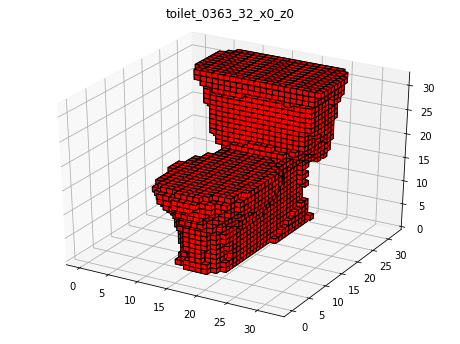

In [6]:
plot_recons(root, 'toilet_0363_32_x0_z0')

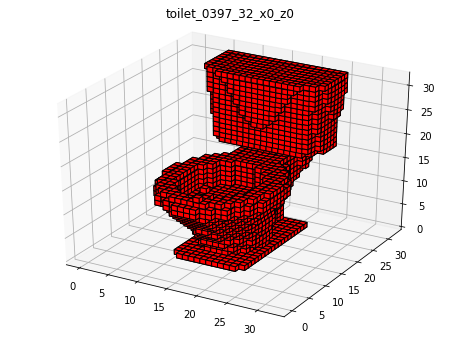

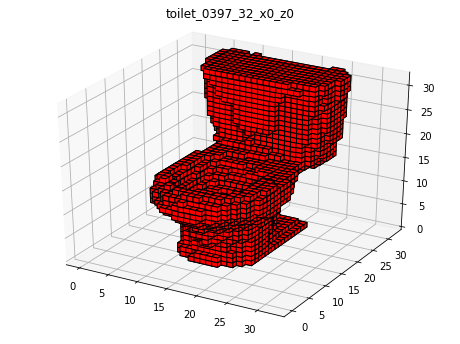

In [7]:
plot_recons(root, 'toilet_0397_32_x0_z0')

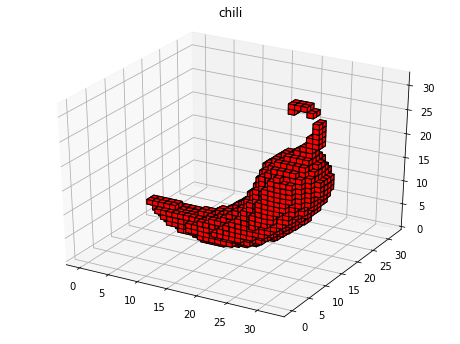

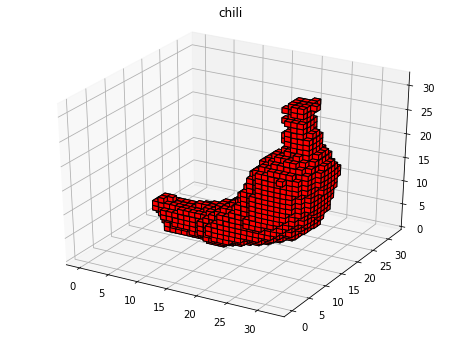

In [31]:
plot_recons(root, 'chili')

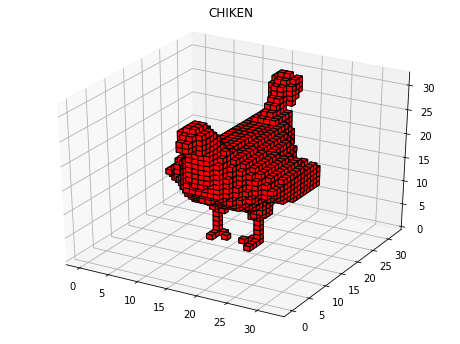

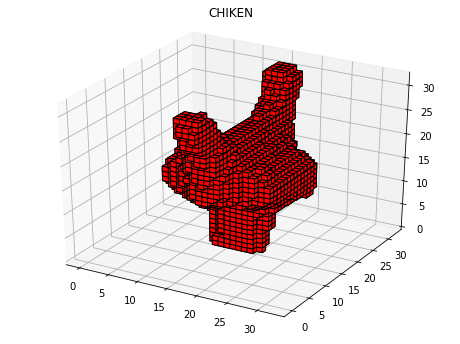

In [32]:
plot_recons(root, 'CHIKEN')

## Bad Combinations

In [48]:
root = os.path.join(DEMOS_DIR, 'bad_combos')

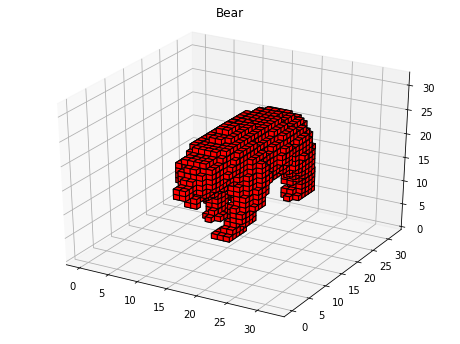

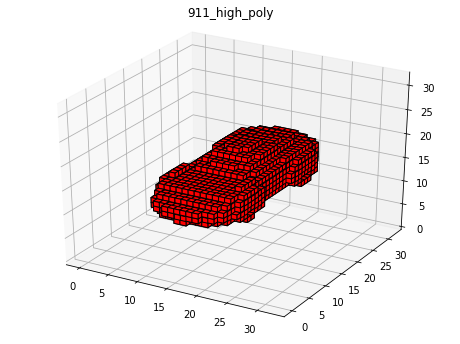

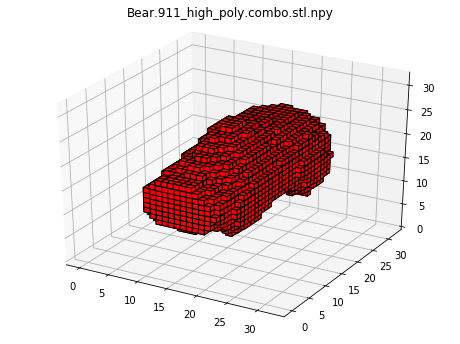

In [49]:
# not enough granularity
plot_combos(root, 'Bear', '911_high_poly')

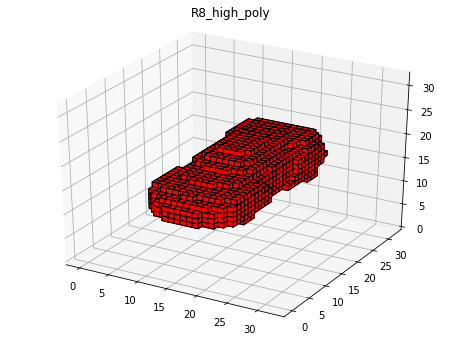

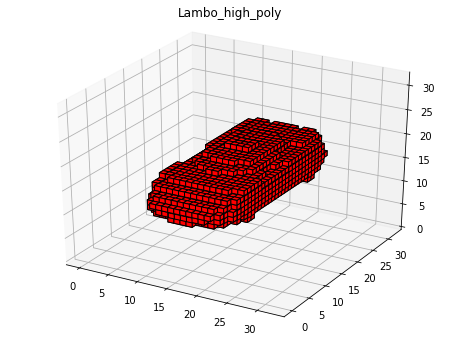

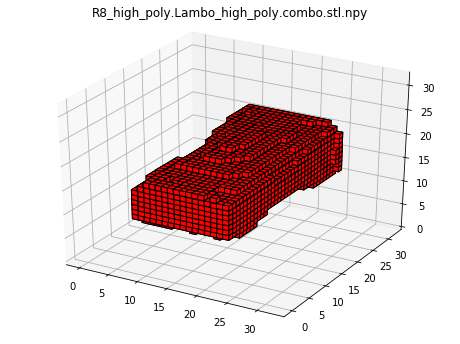

In [50]:
# not enough granularity
plot_combos(root, 'R8_high_poly', 'Lambo_high_poly')

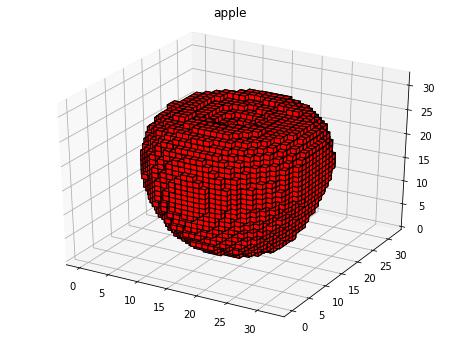

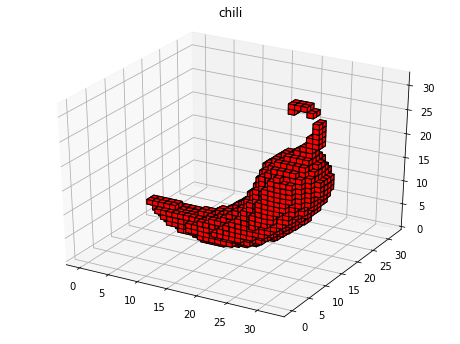

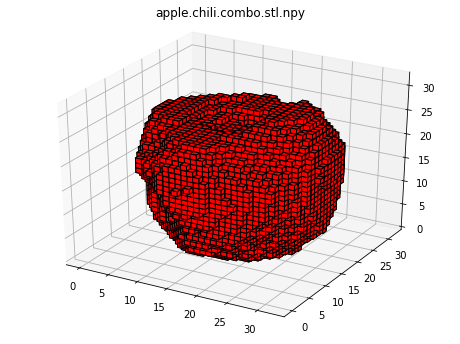

In [51]:
# mismatch in object size
plot_combos(root, 'apple', 'chili')

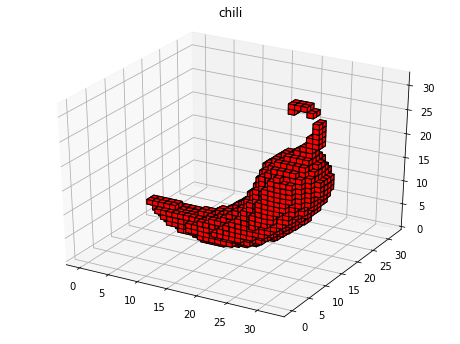

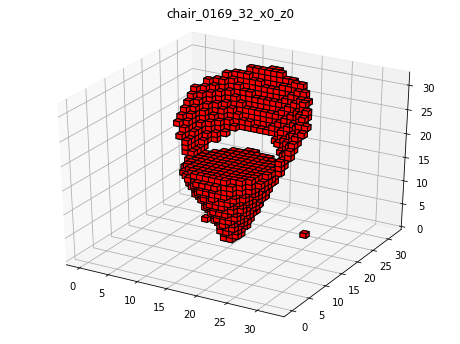

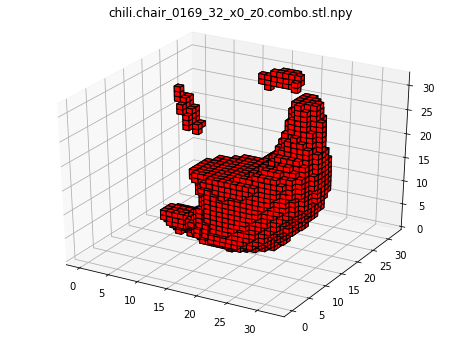

In [53]:
# not aligned in cubic space
plot_combos(root, 'chili', 'chair_0169_32_x0_z0')

## Good Combinations

In [55]:
root = os.path.join(DEMOS_DIR, 'good_combos')

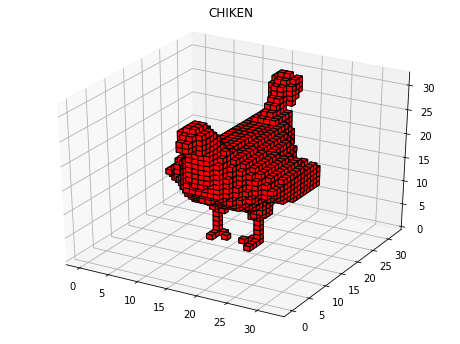

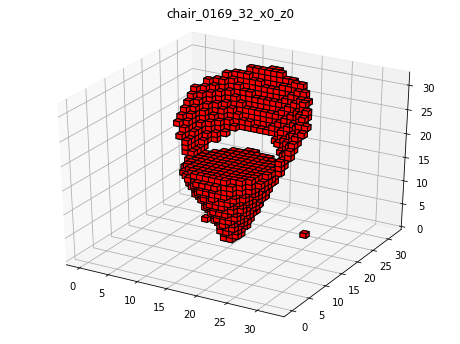

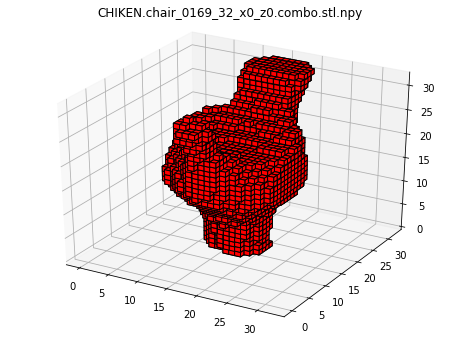

In [56]:
# A chicken-chair! Good for toddlers
plot_combos(root, 'CHIKEN', 'chair_0169_32_x0_z0')

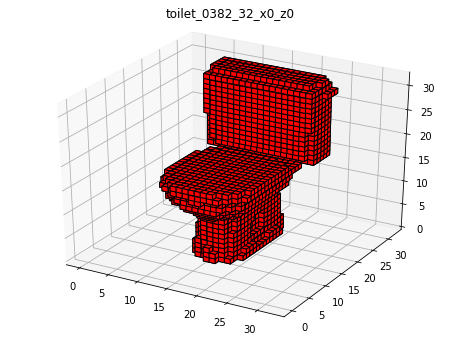

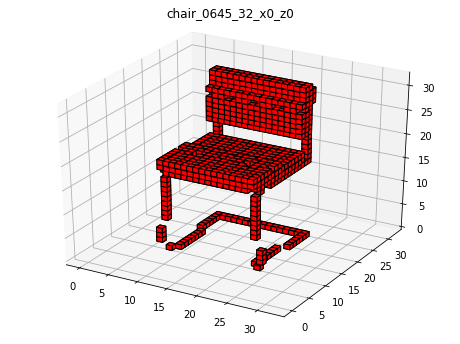

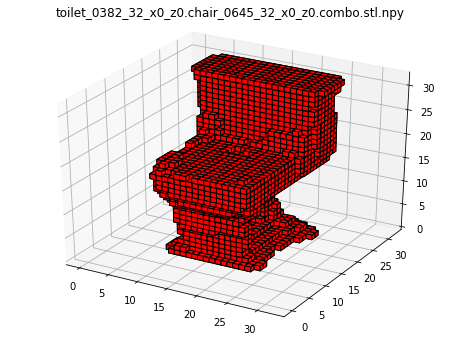

In [57]:
# All the comforts of your favorite chair to go along with your toilet!
plot_combos(root, 'toilet_0382_32_x0_z0', 'chair_0645_32_x0_z0')